# Welcome to Week 2 of your PAMD computer labs

Last week we got familiar with the Jupyter notebook and Noteable environment that we'll be working on this year. This week, we will continue our theoretical discussions from the lectures and work on data pre-processing, normalisation and missing values.

# Task 1 - Binning, dummy encoding and variable transformations

**Task 1.1** Binning numeric variables

This is a common problems that you'll encounter working with data, so it's important to remember the steps how to do this. Start by loading in our wine dataset again, which we used last week.

In [2]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

dataset = datasets.load_wine()
wine = pd.DataFrame(data=dataset["data"], columns=dataset["feature_names"])

print(wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

**Task:** Bin the variable 'flavanoids' into 5 bins using pandas. Make sure that the bins are of equal size, i.e. there is an equal number of elements in each bin.

In [3]:
# Type your code here
wine["flavanoids_bins"] = pd.qcut(wine["flavanoids"], q=5, labels=False, precision=0)
print(wine[["flavanoids", "flavanoids_bins"]])

     flavanoids  flavanoids_bins
0          3.06                4
1          2.76                3
2          3.24                4
3          3.49                4
4          2.69                3
..          ...              ...
173        0.61                0
174        0.75                0
175        0.69                0
176        0.68                0
177        0.76                0

[178 rows x 2 columns]


**Task 1.2** Transforming variables

Start by creating an array of random colours. To practice some random element generators, you can try creating an array of length 100 where 50% of elements are 'red', 10% are 'blue', 10% are 'green' and the remaining 20% are 'yellow'.

In [4]:
# Type your code here
import random as rd

colorList = ["red", "blue", "yellow", "green"]
colorDic = {"red": 50, "blue": 10, "green": 10, "yellow": 30}
ansList = list()
while len(ansList) < 100:
    selection = rd.choice(colorList)
    if ansList.count(selection) == colorDic[selection]:
        colorList.remove(selection)
        selection = rd.choice(colorList)
    ansList.append(selection)

print(
    ansList,
    ansList.count("red"),
    ansList.count("blue"),
    ansList.count("yellow"),
    ansList.count("green"),
)

['yellow', 'green', 'red', 'blue', 'yellow', 'red', 'yellow', 'red', 'red', 'blue', 'blue', 'red', 'green', 'blue', 'green', 'red', 'yellow', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'green', 'green', 'yellow', 'red', 'yellow', 'green', 'red', 'green', 'blue', 'red', 'yellow', 'blue', 'red', 'red', 'blue', 'green', 'red', 'red', 'green', 'yellow', 'yellow', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'yellow', 'red', 'yellow', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'] 50 10 30 10


We discussed in class that categorical variables are often assigned numeric values through dummy encoding. Try that using the pandas library.

In [5]:
# Type your code here
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

colorDf = pd.DataFrame({"color": ansList})
print("Original DataFrame:")
print(colorDf)

# 执行 dummy 编码
dummies = le.fit_transform(colorDf["color"])

# 打印 dummy 编码后的 DataFrame
print("\nDataFrame after dummy encoding:")
print(dummies)

Original DataFrame:
     color
0   yellow
1    green
2      red
3     blue
4   yellow
..     ...
95     red
96     red
97     red
98     red
99     red

[100 rows x 1 columns]

DataFrame after dummy encoding:
[3 1 2 0 3 2 3 2 2 0 0 2 1 0 1 2 3 2 2 2 2 2 1 2 1 1 3 2 3 1 2 1 0 2 3 0 2
 2 0 1 2 2 1 3 3 3 2 3 3 3 3 2 0 0 2 0 2 3 2 3 3 2 3 3 3 2 2 2 3 3 3 3 3 3
 3 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Note how blue isn't assigned a number, because it's taken as the baseline. This is important in analysis for multicollinearity reasons. The drop_first=True command ensures that this is the case, so check what happens if you choose to make it 'False' instead.

In [6]:
# Type your code here
encoded_df1 = pd.get_dummies(colorDf["color"], drop_first=True)
encoded_df2 = pd.get_dummies(colorDf["color"], drop_first=False)

print(encoded_df1, encoded_df2)

    green    red  yellow
0   False  False    True
1    True  False   False
2   False   True   False
3   False  False   False
4   False  False    True
..    ...    ...     ...
95  False   True   False
96  False   True   False
97  False   True   False
98  False   True   False
99  False   True   False

[100 rows x 3 columns]      blue  green    red  yellow
0   False  False  False    True
1   False   True  False   False
2   False  False   True   False
3    True  False  False   False
4   False  False  False    True
..    ...    ...    ...     ...
95  False  False   True   False
96  False  False   True   False
97  False  False   True   False
98  False  False   True   False
99  False  False   True   False

[100 rows x 4 columns]


If you would like to replace each colour with its own assigned integer instead of using dummies, you can try out the label encoder in scikit learn. Use that to create an array of numbers by replacing each colour in colour_array with an integer.

In [7]:
# Type your code here
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

colorDf = pd.DataFrame({"color": ansList})
print("Original DataFrame:")
print(colorDf)

# 执行 dummy 编码
dummies = le.fit_transform(colorDf["color"])

# 打印 dummy 编码后的 DataFrame
print("\nDataFrame after dummy encoding:")
print(dummies)

Original DataFrame:
     color
0   yellow
1    green
2      red
3     blue
4   yellow
..     ...
95     red
96     red
97     red
98     red
99     red

[100 rows x 1 columns]

DataFrame after dummy encoding:
[3 1 2 0 3 2 3 2 2 0 0 2 1 0 1 2 3 2 2 2 2 2 1 2 1 1 3 2 3 1 2 1 0 2 3 0 2
 2 0 1 2 2 1 3 3 3 2 3 3 3 3 2 0 0 2 0 2 3 2 3 3 2 3 3 3 2 2 2 3 3 3 3 3 3
 3 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Task 2 - Normalising and detecting outliers

Continuing with our wine dataset from earlier, let's look into how to normalise numeric variables.

In [8]:
print(wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  flavanoids_bins  
0 

**Task 2.1** Min-max-scaling

sklearn offers us plenty of pre-processing tools, such as scaling and normalisation functions. Specifically, we will look at [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) and [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), which are functions in scikit learns preprocessing package.

Have a brief look at their documentations to get familiar with the main differences between the two functions. We will start with min-max-scaling.

Using the MinMaxScaler and its inbuilt function fit_transform(), transform the wine dataset. You can use the default range of (0,1). Save the result in a separate dataframe so that we can compare them later. Use the describe() function to look at the differences between the original and the transformed dataframe, using a variable of your choice.

In [20]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create a MinMaxScaler object
MMScaler = MinMaxScaler()

# Transform the dataset
scaled_data = MMScaler.fit_transform(wine_df)
scaled_df = pd.DataFrame(scaled_data, columns=wine.feature_names)

# Compare original and transformed data
print("Original Data:")
print(wine_df.describe())

print("\nTransformed Data:")
print(scaled_df.describe())

Original Data:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   


Plot a variable of your choice, first for the original wine dataset then for the transformed dataframe, to compare.

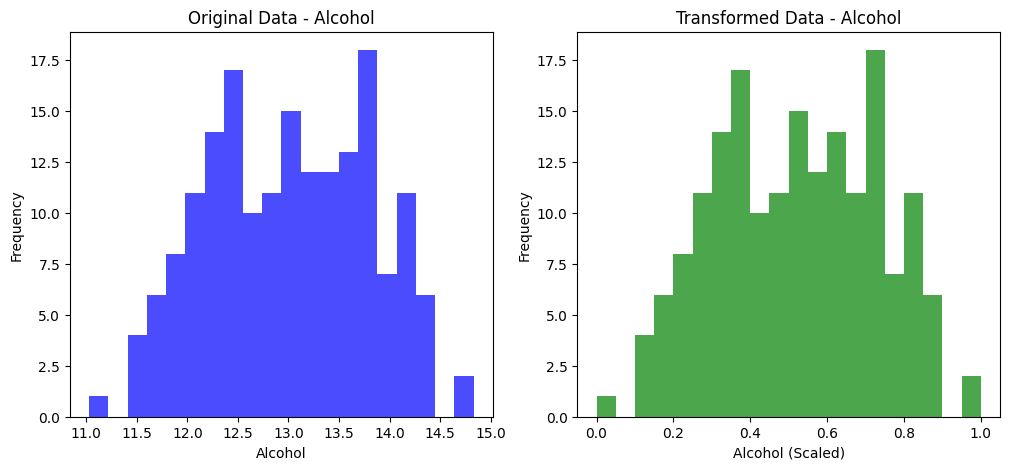

In [10]:
import matplotlib.pyplot as plt

# Original Data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(wine_df["alcohol"], bins=20, color="blue", alpha=0.7)
plt.title("Original Data - Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")

# Transformed Data
plt.subplot(1, 2, 2)
plt.hist(scaled_df["alcohol"], bins=20, color="green", alpha=0.7)
plt.title("Transformed Data - Alcohol")
plt.xlabel("Alcohol (Scaled)")
plt.ylabel("Frequency")

plt.show()

**Task 2.2** Normalisation

Repeat the same process as above, but using the StandardScaler() function. Compare the results.

In [21]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()

# Transform the dataset
std_data = stdScaler.fit_transform(wine_df)
std_df = pd.DataFrame(std_data, columns=wine.feature_names)

# Compare original and transformed data
print("Original Data:")
print(wine_df.describe())

print("\nTransformed Data:")
print(std_df.describe())

Original Data:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   


Note how the results are the same for the selected range of [0,1] for the min-max-scaler. You can try different values for min and max and watch how the results change.

# Task 3 - Outlier detection

Scikit learn also has inbuilt functions for detecting outliers. We will be looking at two functions: [EllipticEnvlope](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html) and [LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html).

EllipticEnvlope can be used for fitting a multivariate Gaussian distribution. It has a parameter contamination rate, indicating the proportion of outliers that will be returned. 

For LocalOutlierFactor we can define both the number of neighbours 𝑘 and the contamination rate.

Check their documentation for more details and then try them out yourself.

**Task 3.1** EllipticEnvlope for outlier detection

Check for outliers in the wine dataset using the EllipticEnvlope function. You can try out different values for the contamination rate. Save the output from the function as a new column in your wine dataframe, so that we can compare them visually later.

In [31]:
from sklearn.covariance import EllipticEnvelope
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)


# Create an EllipticEnvelope model
envelope = EllipticEnvelope(
    contamination=0.1
)  # Adjust the contamination rate as needed

# Fit the EllipticEnvelope model to the wine dataset
envelope.fit(wine_df)

# Predict the outliers in the wine dataset
outliers = envelope.predict(wine_df)

# Add the outliers column to the wine DataFrame
wine_df["outliersENV"] = np.where(outliers == -1, "Outlier", "Inlier")

# Display the wine DataFrame with the new outliers column
print(wine_df[["alcohol", "malic_acid", "outliersENV"]])

     alcohol  malic_acid outliersENV
0      14.23        1.71      Inlier
1      13.20        1.78      Inlier
2      13.16        2.36      Inlier
3      14.37        1.95      Inlier
4      13.24        2.59      Inlier
..       ...         ...         ...
173    13.71        5.65      Inlier
174    13.40        3.91      Inlier
175    13.27        4.28      Inlier
176    13.17        2.59      Inlier
177    14.13        4.10      Inlier

[178 rows x 3 columns]


**Task 3.2** LocalOutlierFactor for outlier detection

Now, using the same contamination rate as for the EllipticEnvelope function above, repeat the process using the LocalOutlierFactor function. Again, save your results in a new column in the wine dataframe.

In [30]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create a LocalOutlierFactor model
lof = LocalOutlierFactor(
    n_neighbors=20, contamination=0.1
)  # You can adjust these parameters as needed

# Fit the model and predict the outliers
outliers = lof.fit_predict(wine_df)

# Add the outliers column to the wine DataFrame
wine_df["outliersLOC"] = np.where(outliers == -1, "Outlier", "Inlier")

# Display the DataFrame with the new outliers column
print(wine_df[["alcohol", "malic_acid", "outliersLOC"]])

     alcohol  malic_acid outliersLOC
0      14.23        1.71      Inlier
1      13.20        1.78      Inlier
2      13.16        2.36      Inlier
3      14.37        1.95     Outlier
4      13.24        2.59      Inlier
..       ...         ...         ...
173    13.71        5.65      Inlier
174    13.40        3.91      Inlier
175    13.27        4.28      Inlier
176    13.17        2.59      Inlier
177    14.13        4.10      Inlier

[178 rows x 3 columns]


You can now create a comparison between the two solutions, visually or as a table. If you would like to try something more complex, you can create multiple plots showing a comparison of different neighbour and contamination values.

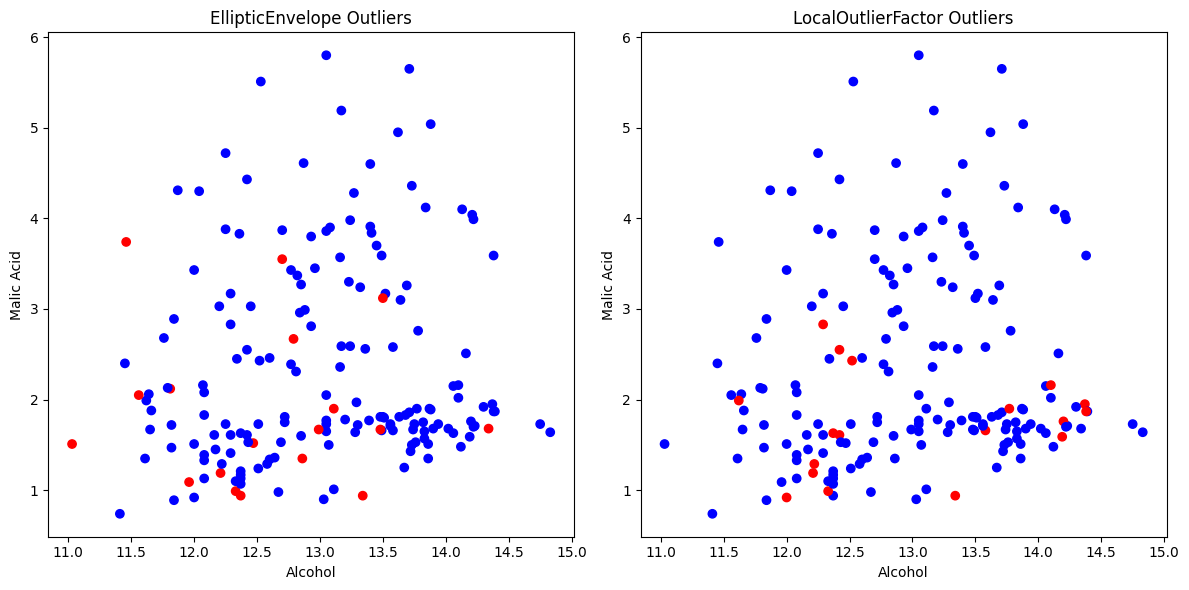

In [32]:
import numpy as np
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create an EllipticEnvelope model
envelope = EllipticEnvelope(contamination=0.1)
envelope.fit(wine_df)
env_outliers = envelope.predict(wine_df)
wine_df["outliersENV"] = np.where(env_outliers == -1, "Outlier", "Inlier")

# Create a LocalOutlierFactor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_outliers = lof.fit_predict(wine_df.drop(columns=["outliersENV"]))
wine_df["outliersLOF"] = np.where(lof_outliers == -1, "Outlier", "Inlier")

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(
    wine_df["alcohol"],
    wine_df["malic_acid"],
    c=wine_df["outliersENV"].apply(lambda x: "red" if x == "Outlier" else "blue"),
)
plt.title("EllipticEnvelope Outliers")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")

plt.subplot(1, 2, 2)
plt.scatter(
    wine_df["alcohol"],
    wine_df["malic_acid"],
    c=wine_df["outliersLOF"].apply(lambda x: "red" if x == "Outlier" else "blue"),
)
plt.title("LocalOutlierFactor Outliers")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")

plt.tight_layout()
plt.show()

# Task 4 - Missing values

The last task of today is about handling missing values. Our wine dataset is too good for that, though, so let's use a quick dataframe with some missing values that we can tackle. I have uploaded a synthetic example dataset for bank products to Learn which we will use now. Make sure you have uploaded it to your Noteable workspace to ensure you can work with it.

It's really small, so you'll be able to print the whole frame.

In [51]:
df = pd.read_csv("MV_example.csv")
print(df)

     Amount          Loan type  Age Gender
0   50000.0           Mortgage   19      F
1    1000.0           Car loan   23      M
2   27000.0           Car loan   44      M
3  655555.0           Mortgage   45      F
4  187666.0           Mortgage   65      F
5  165777.0           Mortgage   39    NaN
6       NaN           Mortgage   36      F
7  145000.0                NaN   27      F
8  156899.0           Mortgage   48      F
9   15000.0  Short-term credit   55      M


**Task 4.1** Dropping NAs

One of the easiest ways to handle missing values, is to simply drop (delete) them. Let's first check how many missing values we actually have. In our example we can simply see them, but in the future you will be working with dataframes too big for that.

In [57]:
# 找出有缺失值的行
missing_values_rows = df[df.isnull().any(axis=1)]

# 打印有缺失值的行
print(missing_values_rows)

     Amount Loan type  Age Gender
5  165777.0  Mortgage   39    NaN
6       NaN  Mortgage   36      F
7  145000.0       NaN   27      F


Now drop rows with missing values using a method of your choice. 

I will be using pandas for that, but feel free to experiment.

In [61]:
DropRowDf = df.dropna(axis=0)
print(DropRowDf)

     Amount          Loan type  Age Gender
0   50000.0           Mortgage   19      F
1    1000.0           Car loan   23      M
2   27000.0           Car loan   44      M
3  655555.0           Mortgage   45      F
4  187666.0           Mortgage   65      F
8  156899.0           Mortgage   48      F
9   15000.0  Short-term credit   55      M


You can also drop all columns with missing values instead.

In [62]:
DropColumnDf = df.dropna(axis=1)
print(DropColumnDf)

   Age
0   19
1   23
2   44
3   45
4   65
5   39
6   36
7   27
8   48
9   55


**Task 4.2** Imputing missing values

Instead of dropping them, we can replace missing values with a different value to keep our dataset intact. A quick method for that is to impute them with the mean or the median of that variable. Try that below for the variable "Amount".

Tip: To calculate the mean or median of a variable which has missing values, you have to use the nanmean() and nanmedian() functions.

In [82]:
# 计算 nanmean 和 nanmedian
df = pd.read_csv("MV_example.csv")
mean_value = np.nanmean(df["Amount"])
median_value = np.nanmedian(df["Amount"])
print(mean_value, median_value)
print("\noriginal data:\n", df["Amount"].head(7))

# 使用列的均值替换缺失值
df["Amount"].fillna(df["Amount"].mean(), inplace=True)  # 用均值替换
print("\nreplaced by mean:\n", df["Amount"].head(7))
df = pd.read_csv("MV_example.csv")
# 使用列的中位数替换缺失值
df["Amount"].fillna(df["Amount"].median(), inplace=True)  # 用中位数替换
print("\nreplaced by median:\n", df["Amount"].head(7))
# 显示替换后的 DataFrame

155988.55555555556 145000.0

original data:
 0     50000.0
1      1000.0
2     27000.0
3    655555.0
4    187666.0
5    165777.0
6         NaN
Name: Amount, dtype: float64

replaced by mean:
 0     50000.000000
1      1000.000000
2     27000.000000
3    655555.000000
4    187666.000000
5    165777.000000
6    155988.555556
Name: Amount, dtype: float64

replaced by median:
 0     50000.0
1      1000.0
2     27000.0
3    655555.0
4    187666.0
5    165777.0
6    145000.0
Name: Amount, dtype: float64
